Import Libraries

In [35]:
import pandas as pd
import numpy as np
import PyPDF2
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('punkt')
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package punkt to C:\Users\Sanjana
[nltk_data]     Rayarala\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Read Dataset

In [36]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [37]:
print(df['Category'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [38]:
target_counts = df['Category'].value_counts()
print(target_counts)

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


<Axes: title={'center': 'Count of Each Category'}, xlabel='Category', ylabel='Values'>

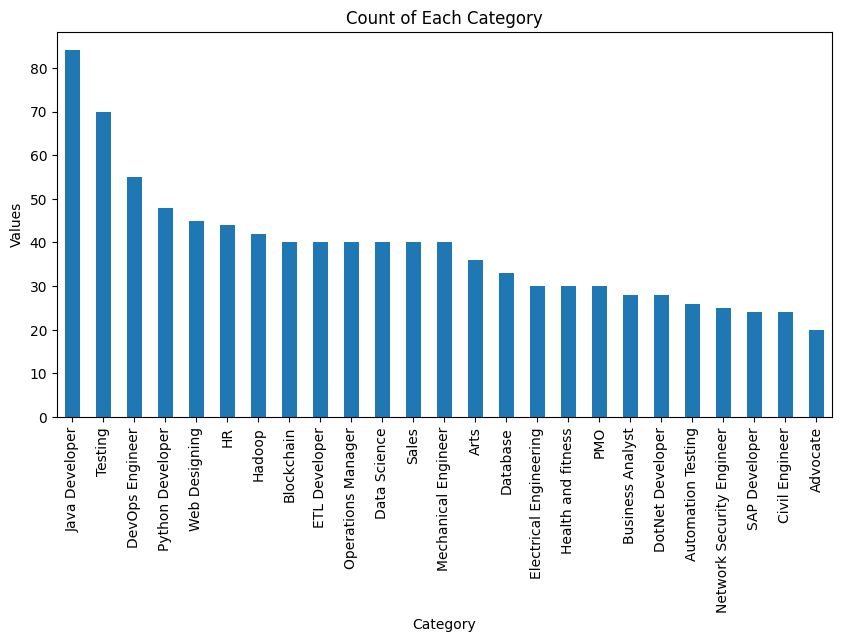

In [39]:
plt.figure(figsize= (10, 5))
plt.xticks(rotation= 90)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Count of Each Category')
target_counts.plot(kind='bar')

In [40]:
def cleanResume(resumeText):
  resumeText = resumeText.lower()
  resumeText = re.sub('http\S+\s*', ' ', resumeText) # removing https
  resumeText = re.sub('#\S+', '', resumeText) # remove words starting with '#'
  resumeText = re.sub('@\S+', ' ', resumeText) # remove words starting with '@'
  resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText) # remove punctuation
  resumeText = re.sub('[^\x00-\x7f]', ' ', resumeText) # remove Non-ASCII characters
  resumeText = re.sub('\d+', '', resumeText)  # remove any numbers
  resumeText = re.sub('\s+', ' ', resumeText) # remove extra spaces
  return resumeText

In [41]:
df['cleaned_resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [42]:
def tokenize_sentence(sentence):
    word_token = nltk.word_tokenize(sentence)
    return ' '.join(word_token)

In [43]:
df['tokenized_resume'] = df['cleaned_resume'].apply(tokenize_sentence)

In [44]:
lenc = LabelEncoder()
df['Category_Labelled'] = lenc.fit_transform(df['Category'])

c:\Users\Sanjana Rayarala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Sanjana Rayarala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [45]:
df.head()

,Category,Resume,cleaned_resume,tokenized_resume,Category_Labelled
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...,skills programming languages python pandas num...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may to may b e uit rgpv data...,education details may to may b e uit rgpv data...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas of interest deep learning control system...,areas of interest deep learning control system...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills r python sap hana tableau sap hana sql ...,skills r python sap hana tableau sap hana sql ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...,education details mca ymcaust faridabad haryan...,6


In [46]:
tokens = df['tokenized_resume'].values
op_labels = df['Category_Labelled'].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(tokens, op_labels, test_size= 0.25)

In [48]:
word_vectorizer = TfidfVectorizer(max_features= 1600)
X_train = word_vectorizer.fit_transform(X_train)
X_test = word_vectorizer.transform(X_test)

ML Models -

In [49]:
mnb = MultinomialNB()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lsvm = LinearSVC()
sgd = SGDClassifier()
knn = KNeighborsClassifier()

In [50]:
model_accuracies = {}
for clf in (mnb, lsvm, lr, knn, sgd, dt, rf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[clf] = accuracy
    print(clf.__class__.__name__, accuracy)

MultinomialNB 0.8506224066390041
LinearSVC 0.991701244813278
LogisticRegression 0.991701244813278
KNeighborsClassifier 0.941908713692946
SGDClassifier 0.991701244813278
DecisionTreeClassifier 0.991701244813278
RandomForestClassifier 0.991701244813278


Choosing Best model

In [51]:
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"Best model: {best_model.__class__.__name__} with accuracy: {model_accuracies[best_model]}")


Best model: LinearSVC with accuracy: 0.991701244813278


In [52]:
best_model.fit(X_train, y_train)
bestmodel_predicted = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, bestmodel_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      0.80      0.89        10
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         9
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00        14
          11       0.82      1.00      0.90         9
          12       1.00      1.00      1.00         8
          13       1.00      1.00      1.00         9
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        14
          17       1.00    

Test on unseen resume

In [55]:
def pdf2text(pdf_file):
  with open(pdf_file, 'rb') as file:
      pdf_reader = PyPDF2.PdfReader(file)
      full_text = ''
      for page_num in range(len(pdf_reader.pages)):
          page = pdf_reader.pages[page_num]
          full_text += page.extract_text()
  return full_text

In [56]:
def ml_prediction(text):
  clean_text = cleanResume(text)
  tokenized_text = tokenize_sentence(clean_text)
  word_features = word_vectorizer.transform([tokenized_text])
  ypred = best_model.predict(word_features)
  decoded_op = lenc.inverse_transform(ypred)
  return decoded_op[0]

In [60]:
input_text = pdf2text('sample_hr.pdf')

In [61]:
out = ml_prediction(input_text)
out

'HR'